# Домашнее задание
## Модуль машинного обучения - 1

### Цель:
Построить модель машинного обучения, предсказывающую цены на жилье в Бостоне.

In [293]:
#Импортируем необходимые модули
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

Импортируем датасет с данными по жилью

In [162]:
from sklearn.datasets import load_boston
boston = load_boston()

Выведем информацию по датасету

In [163]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [164]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [165]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Присвоим колонкам соответствующие имена

In [166]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Добавим целевой столбец

In [167]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Проверим на нулевые значения

In [168]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Нулевых значений не найдено.
Выведем статистику по датасету

In [169]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Составим корреляционную матрицу

In [170]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [171]:
df.shape

(506, 14)

Выведем графическое отображение корреляционной матрицы в виде тепловой карты

<AxesSubplot:>

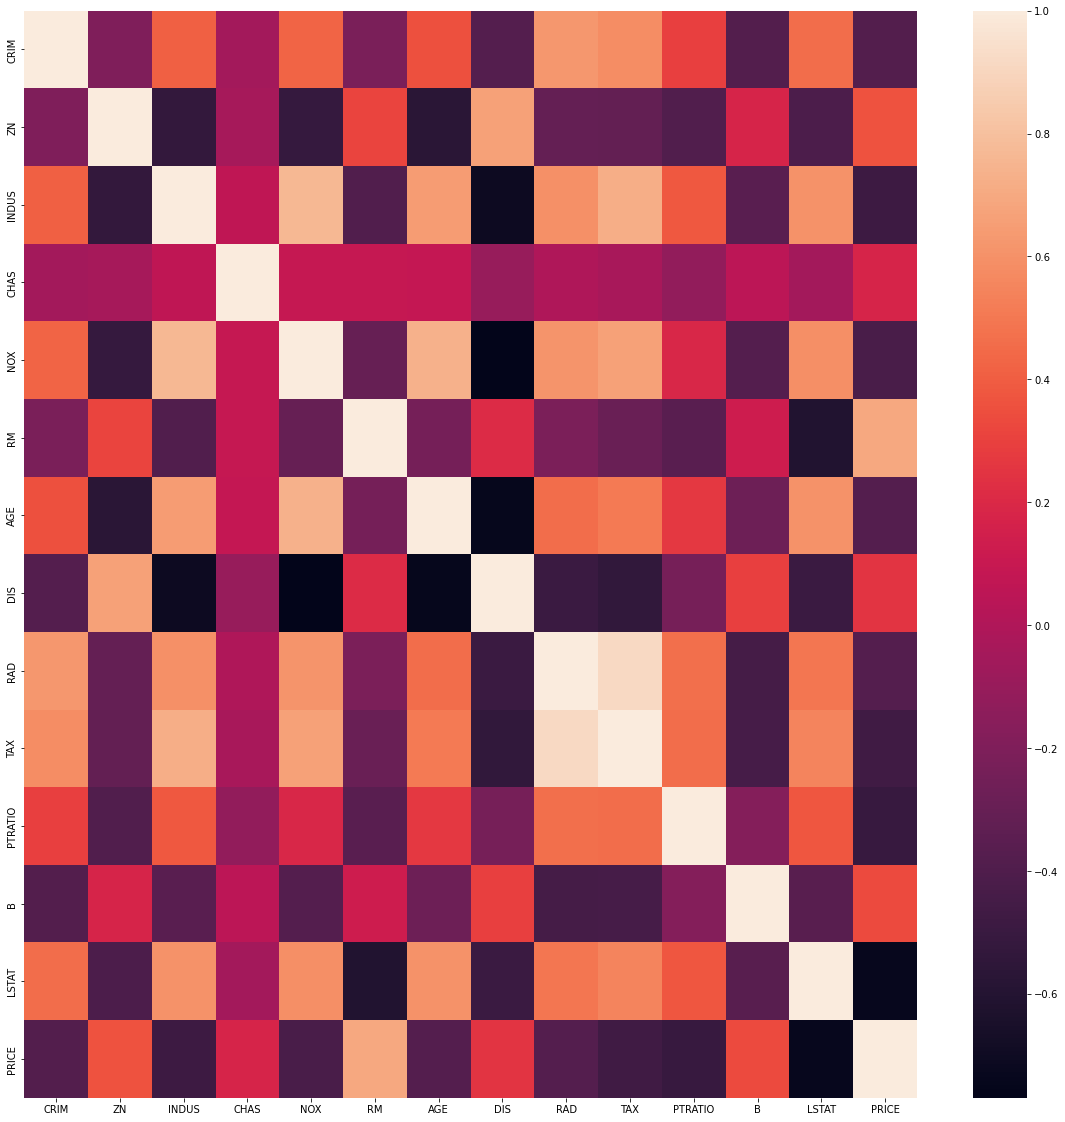

In [172]:
plt.figure(figsize=(20,20))
sns.heatmap(corr)

In [173]:
selector = VarianceThreshold()

In [174]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [175]:
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']

Приступим к обучению модели

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [177]:
reg = LinearRegression().fit(X_train, y_train)

Оценим качество модели. Модель описывает 74% данных.

In [178]:
reg.score(X, y)

0.7370309896765028

In [179]:
reg.coef_

array([-1.18917779e-01,  4.56318023e-02,  4.26291975e-02,  2.72518054e+00,
       -1.85704327e+01,  3.06602675e+00,  3.32296115e-03, -1.48340237e+00,
        3.85139632e-01, -1.43472230e-02, -9.74726932e-01,  1.05544073e-02,
       -5.63095261e-01])

In [180]:
reg.intercept_

41.638341268290006

Сделаем предсказание

In [181]:
y_pred = reg.predict(X_test)

Считаем метрики модели

In [182]:
#Средняя абсолютная процентная ошибка
MAPE = mean_absolute_percentage_error(y_test, y_pred)
MAPE

0.150777702910613

In [183]:
#Средняя квадратичная ошибка
MSE = mean_squared_error(y_test, y_pred)
MSE

21.01830416698908

In [184]:
#Корень из средней квадратичной ошибки
RMSE = math.sqrt(MSE)
RMSE

4.5845724083047354

In [185]:
y_pred

array([33.57363492, 19.07549955, 17.97504927, 24.4864547 , 21.97727077,
       13.5398807 , 27.30327386, 29.25118101, 36.22373544, 13.03483649,
       16.7218358 , 14.28595242, 36.7081643 , 22.99696511, 16.38695539,
       33.65121093, 14.64207561, 29.80955494, 12.88268953, 20.77081153,
       19.52682693, 22.95694483, 22.48415616, 25.94686931, 29.99765595,
       22.79290663, 38.35473574, 31.11878649, 21.42106647, 20.85864063,
       29.29257111, 15.50484911,  8.95073334, 23.15232424, 20.1529332 ,
       27.1169651 , 24.96145249, 19.42693069, 22.94974241, 23.69147787,
       22.08661852, 39.67699541, 23.69038457, 25.00197973, 24.49545421,
       20.06423782, 42.00307478, 17.54853934, 25.75958676, 31.01923603,
       11.02336773, 19.03473132, 21.51695513, 43.40135467, 32.50246511,
       11.57067477, 30.64335304, 22.60774355, 34.79111   , 20.86160479,
       22.94892769, 14.71477769, 34.45070166, 21.10849259, 18.43172409,
       19.08532184, 26.45988742, 16.54910961, 20.37342349,  8.59

In [186]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80
448,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13
171,2.31390,0.0,19.58,0.0,0.605,5.880,97.3,2.3887,5.0,403.0,14.7,348.13,12.03
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11
482,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01
378,23.64820,0.0,18.10,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,396.90,23.69
462,6.65492,0.0,18.10,0.0,0.713,6.317,83.0,2.7344,24.0,666.0,20.2,396.90,13.99


Сравним показания для цены в предсказании и в исходном датасете:

In [187]:
df.iloc[42]

CRIM         0.1415
ZN           0.0000
INDUS        6.9100
CHAS         0.0000
NOX          0.4480
RM           6.1690
AGE          6.6000
DIS          5.7209
RAD          3.0000
TAX        233.0000
PTRATIO     17.9000
B          383.3700
LSTAT        5.8100
PRICE       25.3000
Name: 42, dtype: float64

Для 42 записи имеем 25,3 тыс долларов в исходных данных и 25,065 тыс долларов в предсказании

Исходя из полученных результатов и на основании метрик (MAPE = 0,184), можем сделать вывод о том, что модель достаточно точна.

### Уберем слабо коррелирующие параметры и обучим модель заново

Параметры 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD',
        'TAX', 'PTRATIO', 'LSTAT' слабо коррелируют с 'PRICE'

In [268]:
col = ['ZN', 'CHAS', 'RM', 'DIS', 'B', 'PRICE']

In [269]:
df_new = df[col]

In [270]:
df_new.describe()

,ZN,CHAS,RM,DIS,B,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,0.069170,6.284634,3.795043,356.674032,22.532806
std,23.322453,0.253994,0.702617,2.105710,91.294864,9.197104
min,0.000000,0.000000,3.561000,1.129600,0.320000,5.000000
25%,0.000000,0.000000,5.885500,2.100175,375.377500,17.025000
50%,0.000000,0.000000,6.208500,3.207450,391.440000,21.200000
75%,12.500000,0.000000,6.623500,5.188425,396.225000,25.000000
max,100.000000,1.000000,8.780000,12.126500,396.900000,50.000000


In [271]:
corr = df_new.corr()
corr

,ZN,CHAS,RM,DIS,B,PRICE
ZN,1.000000,-0.042697,0.311991,0.664408,0.175520,0.360445
CHAS,-0.042697,1.000000,0.091251,-0.099176,0.048788,0.175260
RM,0.311991,0.091251,1.000000,0.205246,0.128069,0.695360
DIS,0.664408,-0.099176,0.205246,1.000000,0.291512,0.249929
B,0.175520,0.048788,0.128069,0.291512,1.000000,0.333461
PRICE,0.360445,0.175260,0.695360,0.249929,0.333461,1.000000


<AxesSubplot:>

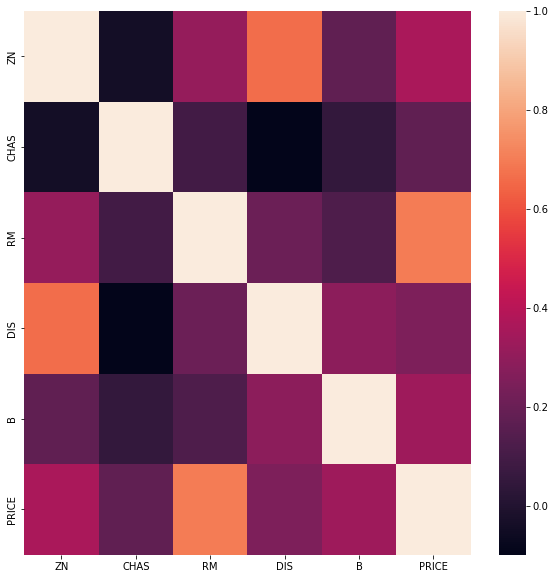

In [272]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)

In [273]:
selector = VarianceThreshold()

In [274]:
X_1 = df_new.drop(['PRICE'], axis = 1)
y_1 = df_new['PRICE']

In [275]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = 0.02)

In [276]:
reg = LinearRegression().fit(X1_train, y1_train)

In [277]:
reg.score(X_1, y_1)

0.5713733079636324

Модель описывает 57% данных. Меньше, чем у датасета со всеми параметрами

In [278]:
reg.coef_

array([ 0.06301107,  4.11263557,  8.06496756, -0.18223216,  0.02311221])

In [279]:
reg.intercept_

-36.69289357209864

In [280]:
y1_pred = reg.predict(X1_test)

In [281]:
#Средняя абсолютная процентная ошибка
MAPE = mean_absolute_percentage_error(y1_test, y1_pred)
MAPE

0.11744578346837865

In [282]:
#Средняя квадратичная ошибка
MSE = mean_squared_error(y1_test, y1_pred)
MSE

7.9118767272379245

In [283]:
#Корень из средней квадратичной ошибки
RMSE = math.sqrt(MSE)
RMSE

2.8128058459904275

Метрики ошибок снизились по сравнению с исходной моделью, новая модель точнее.

In [284]:
y1_pred

array([23.47841642, 23.10478048, 19.47376747, 19.6213267 , 21.50412196,
       23.98386477, 18.63900975, 19.91420842, 33.83699248, 17.95760886,
       29.12058008])

In [285]:
X1_test

,ZN,CHAS,RM,DIS,B
320,0.0,0.0,6.426,4.5404,396.90
360,0.0,0.0,6.398,2.5182,374.56
67,12.5,0.0,5.878,6.4980,396.21
12,12.5,0.0,5.889,5.4509,390.50
246,22.0,0.0,6.108,8.0555,390.18
94,28.0,0.0,6.249,3.6150,396.90
115,0.0,0.0,5.928,2.4631,344.91
431,0.0,0.0,6.833,2.0882,81.33
306,33.0,0.0,7.420,3.0992,396.90
127,0.0,0.0,5.693,1.7883,392.11


In [287]:
df_new.iloc[320]

ZN         0.0000
CHAS       0.0000
RM         6.4260
DIS        4.5404
B        396.9000
PRICE     23.8000
Name: 320, dtype: float64

Предсказанное значение PRICE 23.478, исходное 23.8, достаточно точно

## Регуляризация

In [288]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [289]:
def evaluate_model(Model, lambdas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for l in lambdas:
        # in sklearn, they refer to lambda as alpha, the name is different in different literature
        # Model will be either Lasso, Ridge or ElasticNet
        model = Model(alpha=l, max_iter=1000, random_state = 113) # we allow max number of iterations until the model converges
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

## Лассо

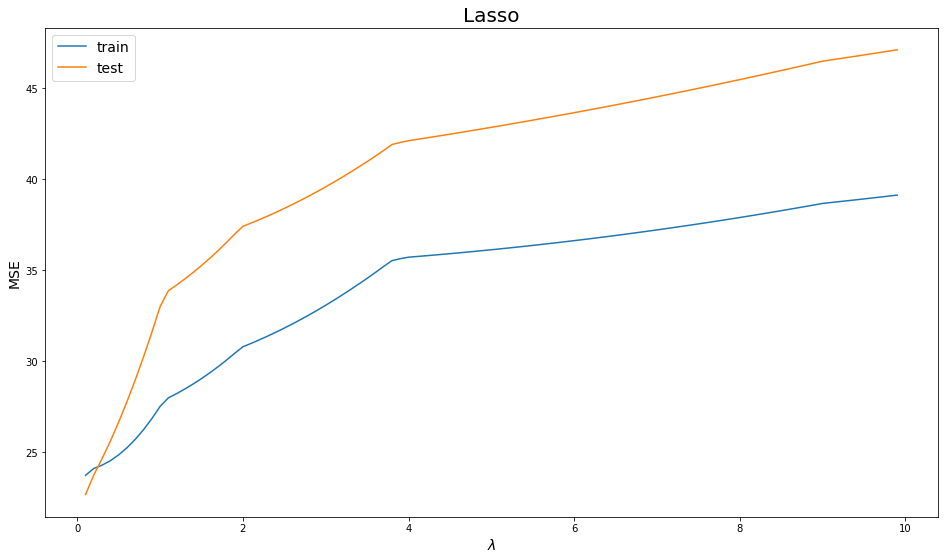

In [303]:
lambdas = np.arange(0.1, 10, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

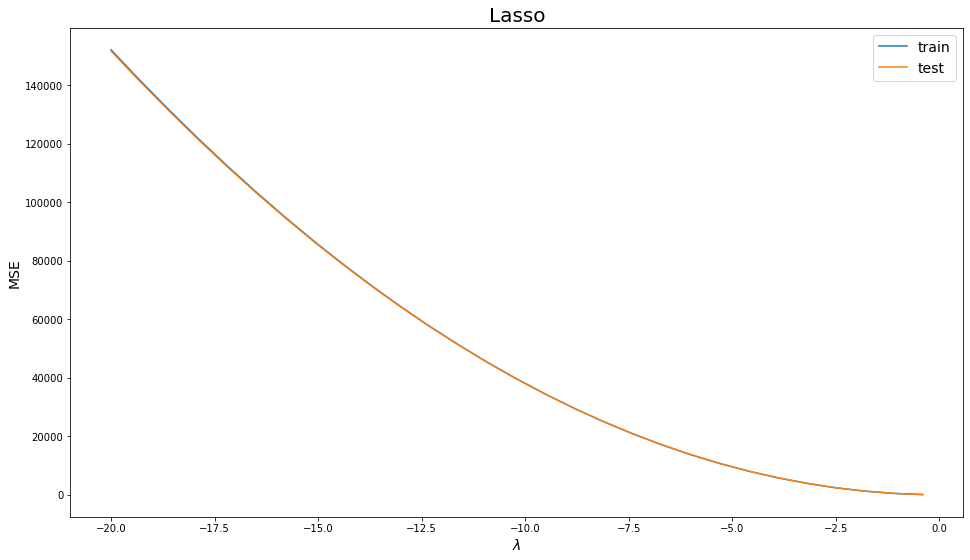

In [319]:
lambdas = np.arange(-20, 0.2, step=0.7)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

## Ridge L2 Regularization

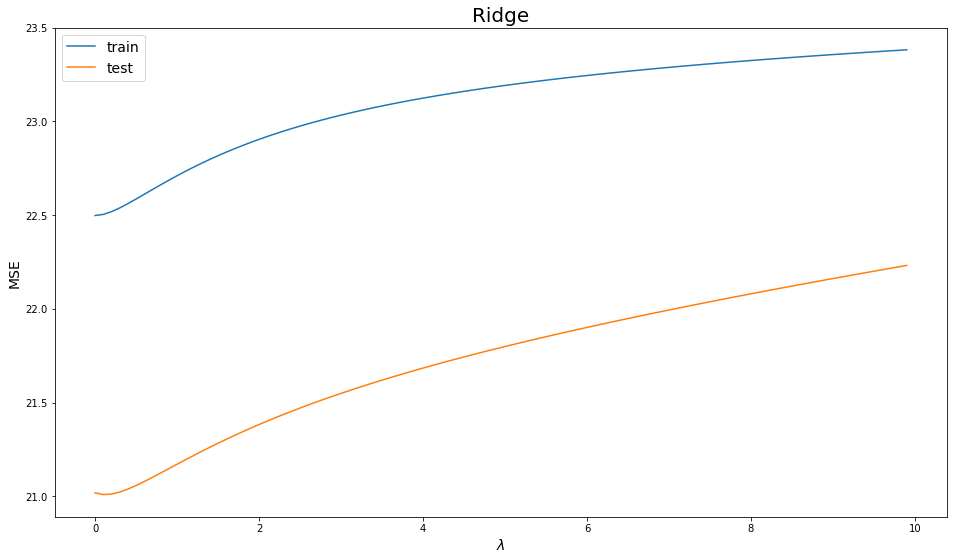

In [320]:
lambdas = np.arange(0, 10, step=0.1)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")

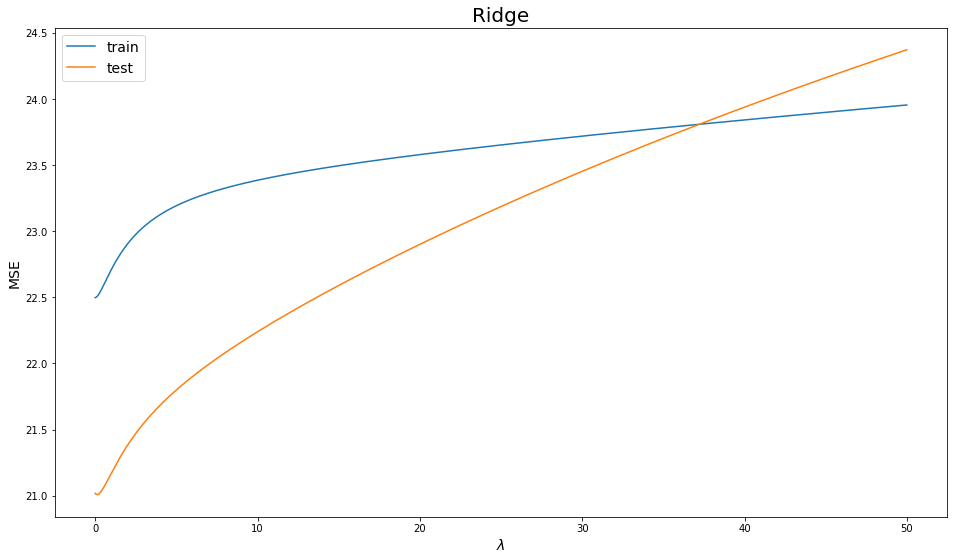

In [321]:
lambdas = np.arange(0, 50., step=0.01)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")

## Elastic Net Regularization

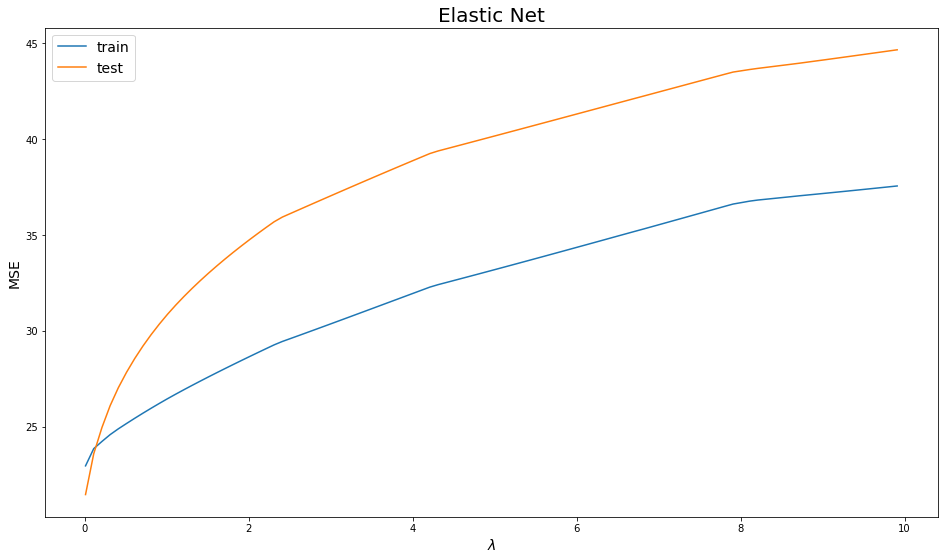

In [327]:
lambdas = np.arange(0.01, 10, step=0.1)

elastic_train, elastic_test = evaluate_model(ElasticNet, lambdas)
plot_errors(lambdas, elastic_train, elastic_test, "Elastic Net")

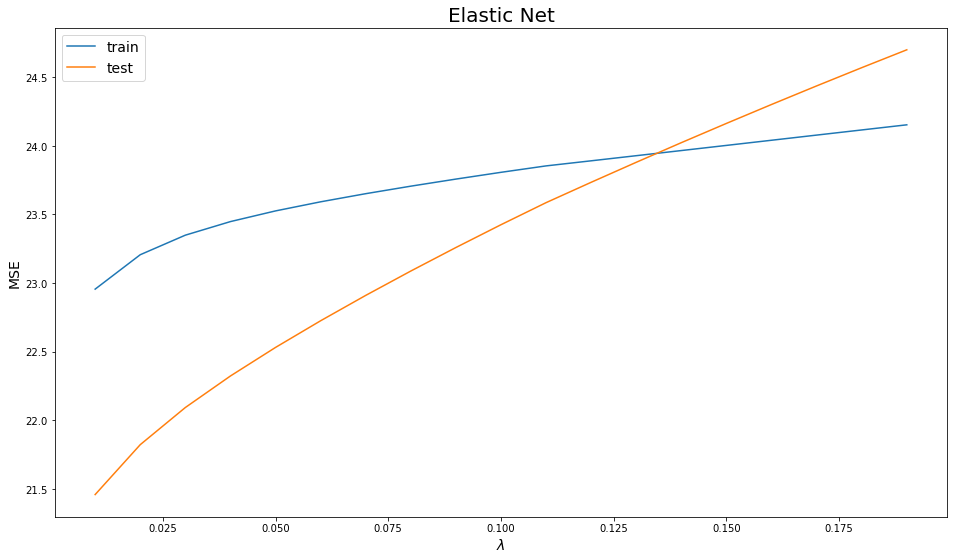

In [326]:
lambdas = np.arange(0.01, 0.2, step=0.01)

elastic_train, elastic_test = evaluate_model(ElasticNet, lambdas)
plot_errors(lambdas, elastic_train, elastic_test, "Elastic Net")